In [43]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve, precision_recall_curve, average_precision_score
sns.set_palette('Spectral')

In [44]:
data = load_iris(as_frame=True)
features = data.data
target  = data.target

print(features.head())
print('\n')
print(target.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [45]:
features = features.rename(columns={'sepal length (cm)': 'sepal length', 'sepal width (cm)': 'sepal width', 'petal length (cm)': 'petal length', 'petal width (cm)': 'petal width'})
features.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [46]:
print(features.shape)

(150, 4)


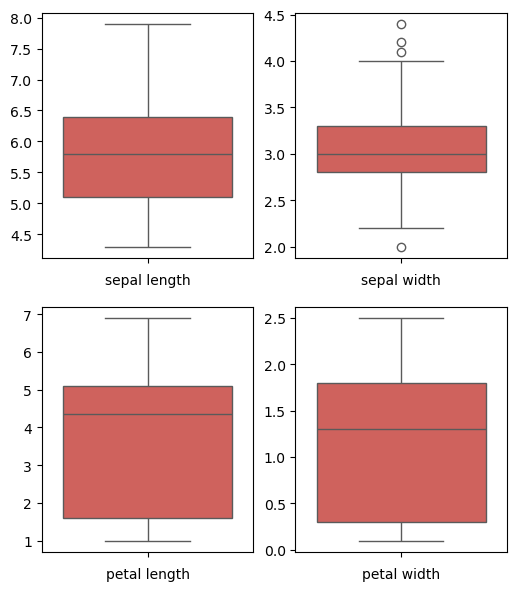

In [47]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 7))
axes = axes.flatten()

for index, column in enumerate(features.columns):
    sns.boxplot(features[column], ax=axes[index])
    axes[index].set_ylabel(None)
    axes[index].set_xlabel(column)

In [48]:
target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, shuffle=True, random_state=100)
print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


In [50]:
lr_sklearn = LogisticRegression().fit(X_train, y_train)
predictions_sklearn = lr_sklearn.predict(X_test)
prediction_probabilities_sklearn = lr_sklearn.predict_proba(X_test)

In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_sklearn_scaled = LogisticRegression().fit(X_train_scaled, y_train)
predictions_sklearn_scaled = lr_sklearn_scaled.predict(X_test_scaled)
prediction_probabilities_sklearn_scaled = lr_sklearn.predict_proba(X_test_scaled)

/home/mustafa/miniconda3/envs/t2/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [52]:
from sklearn.metrics import recall_score, precision_score

accuracy_before_scaling = accuracy_score(y_test, predictions_sklearn)
accuracy_after_scaling = accuracy_score(y_test, predictions_sklearn_scaled)

recall_before_scaling = recall_score(y_test, predictions_sklearn, average='macro')
recall_after_scaling = recall_score(y_test, predictions_sklearn_scaled, average='macro')

precision_before_scaling = precision_score(y_test, predictions_sklearn, average='macro')
precision_after_scaling = precision_score(y_test, predictions_sklearn_scaled, average='macro')

f1_before_scaling = f1_score(y_test, predictions_sklearn, average='macro')
f1_after_scaling = f1_score(y_test, predictions_sklearn_scaled, average='macro')

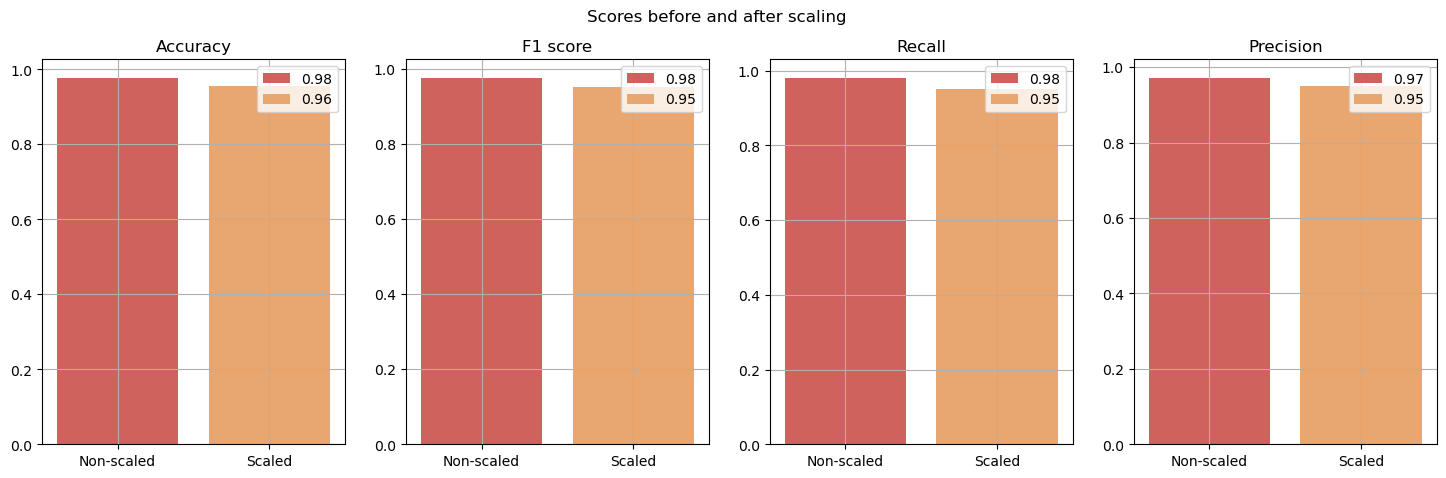

In [53]:
fig, ax = plt.subplots(1, 4, figsize=(18, 5))

sns.barplot(x=['Non-scaled'], y=accuracy_before_scaling, label=f'{accuracy_before_scaling:.2f}', ax=ax[0])
sns.barplot(x=['Scaled'], y=accuracy_after_scaling, label=f'{accuracy_after_scaling:.2f}',ax=ax[0])


sns.barplot(x=['Non-scaled'], y=f1_before_scaling, label=f'{f1_before_scaling:.2f}', ax=ax[1])
sns.barplot(x=['Scaled'], y=f1_after_scaling, label=f'{f1_after_scaling:.2f}',ax=ax[1])


sns.barplot(x=['Non-scaled'], y=recall_before_scaling, label=f'{recall_before_scaling:.2f}', ax=ax[2])
sns.barplot(x=['Scaled'], y=recall_after_scaling, label=f'{recall_after_scaling:.2f}',ax=ax[2])


sns.barplot(x=['Non-scaled'], y=precision_before_scaling, label=f'{precision_before_scaling:.2f}', ax=ax[3])
sns.barplot(x=['Scaled'], y=precision_after_scaling, label=f'{precision_after_scaling:.2f}',ax=ax[3])


fig.suptitle('Scores before and after scaling')
ax[0].grid(True); ax[0].set_title('Accuracy')
ax[1].grid(True); ax[1].set_title('F1 score')
ax[2].grid(True); ax[2].set_title('Recall')
ax[3].grid(True); ax[3].set_title('Precision');

Text(0.5, 1.0, 'After scaling')

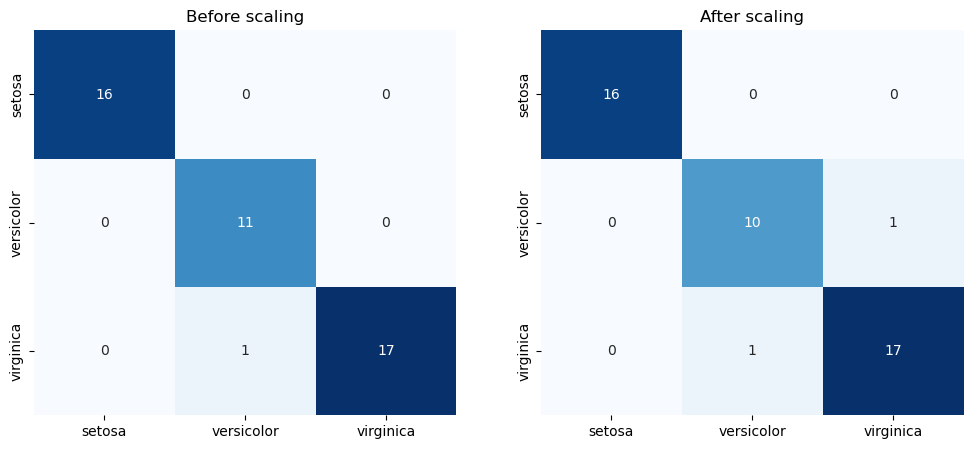

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, predictions_sklearn), annot=True, cbar=False, cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names, ax=ax[0])
sns.heatmap(confusion_matrix(y_test, predictions_sklearn_scaled), annot=True,cbar=False, cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names, ax=ax[1])
ax[0].set_title('Before scaling')
ax[1].set_title('After scaling')

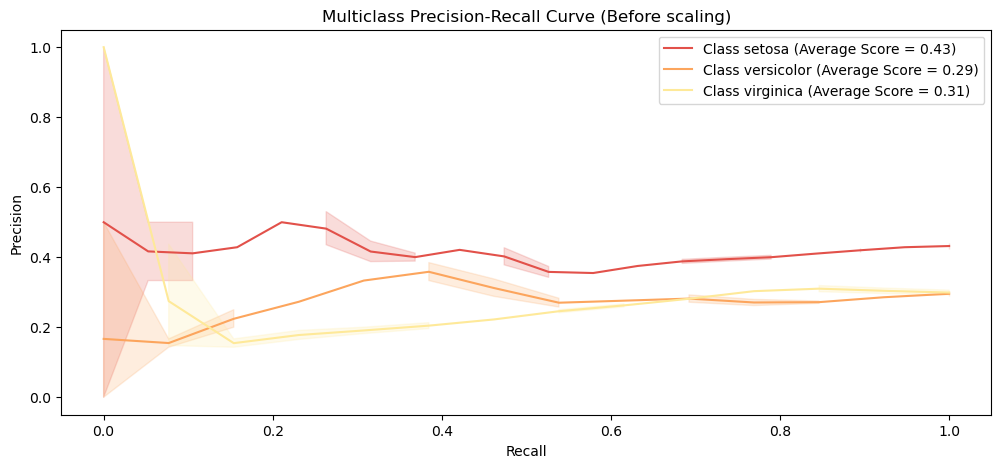

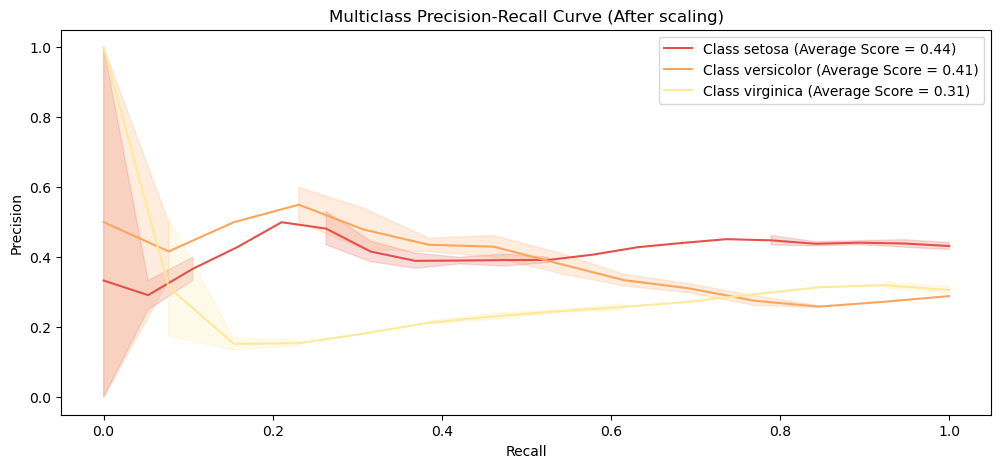

In [55]:
y_bin = label_binarize(target, classes=[0, 1, 2])
n_classes = y_bin.shape[1]
X_train, X_test, y_train_bin, y_test_bin = train_test_split(features, y_bin, test_size=0.3, random_state=42)

plt.figure(figsize=(12, 5))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], prediction_probabilities_sklearn[:, i])
    average_score = average_precision_score(y_test_bin[:, i], prediction_probabilities_sklearn[:, i])
    sns.lineplot(x=recall, y=precision, label=f'Class {data.target_names[i]} (Average Score = {average_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multiclass Precision-Recall Curve (Before scaling)')

plt.figure(figsize=(12, 5))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], prediction_probabilities_sklearn_scaled[:, i])
    average_score = average_precision_score(y_test_bin[:, i], prediction_probabilities_sklearn_scaled[:, i])
    sns.lineplot(x=recall, y=precision, label=f'Class {data.target_names[i]} (Average Score = {average_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multiclass Precision-Recall Curve (After scaling)');

/home/mustafa/miniconda3/envs/t2/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mustafa/miniconda3/envs/t2/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

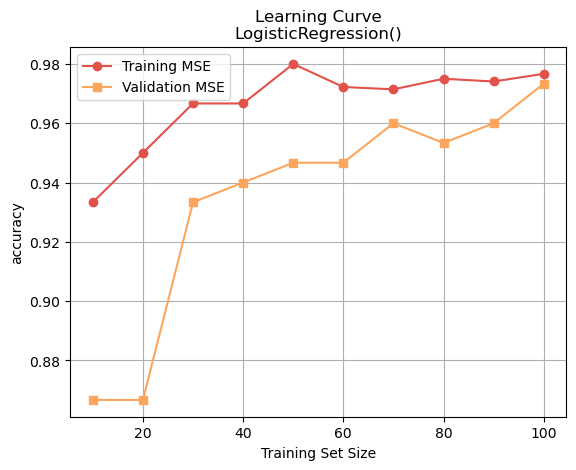

In [58]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=3, scoring='accuracy', ax=None):
    '''
        Plots a learning curve showing training and validation errors 
        (Mean Squared Error) as a function of training set size.

        Parameters
        ----------
        model : estimator object
            The machine learning model that implements the scikit-learn fit/predict interface.

        X : array-like of shape (n_samples, n_features)
            Feature matrix.

        y : array-like of shape (n_samples,)
            Target vector.

        train_sizes : array-like of shape (n_ticks,), default=np.linspace(0.1, 1.0, 10)
            Relative or absolute numbers of training examples that will be used 
            to generate the learning curve. Values should be between 0 and 1 
            if float, representing a fraction of the training data.

        cv : int, cross-validation generator or an iterable, default=3
            Determines the cross-validation splitting strategy. Passed directly 
            to `sklearn.model_selection.learning_curve`.

        scoring : str or callable, default='neg_mean_squared_error'
            A scoring strategy, compatible with scikit-learn's scoring options. 
            Default uses negative MSE for regression.

        ax : matplotlib Axes object, default=None
            The axes on which to plot. If None, a new one will be created using `plt.gca()`.

        Returns
        -------
        None
            The function modifies the provided Axes object in place to display the learning curve.

        Notes
        -----
        - Converts negative MSE to positive before plotting.
        - Uses cross-validation to compute mean training and validation errors.
        - Random shuffling is applied before splitting the data to improve robustness.
    '''
    if ax is None:
        ax = plt.gca()

    train_sizes, train_scores, val_scores = learning_curve(
        estimator=model,
        X=X,
        y=y,
        train_sizes=train_sizes,
        cv=cv,
        scoring=scoring,
        shuffle=True,
        random_state=42,
        n_jobs=-1,
    )
    
    # do not negate
    train_errors = np.mean(train_scores, axis=1)
    val_errors = np.mean(val_scores, axis=1)

    ax.plot(train_sizes, train_errors, label='Training MSE', marker='o')
    ax.plot(train_sizes, val_errors, label='Validation MSE', marker='s')
    ax.set_title(f'Learning Curve\n{str(model)}')
    ax.set_xlabel('Training Set Size')
    ax.set_ylabel(f'{scoring}')
    ax.legend()
    ax.grid()

plot_learning_curve(lr_sklearn_scaled, features, target)